## Q2 - ML Assignment 1

### Part - A and Part - B
- In this part, we implement Logistic Regression with Stochastic Gradient Descent from scratch.
- We split our dataset into a 70:20:10 - train:validation:test split and calculate train loss, validation loss, training accuracy and validation accuracy at each epoch.
- We plot these for 4 learning rates: $0.001, 0.01, 0.1, 1$

In [40]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# Read the data from the CSV file
df = pd.read_csv("/Users/arnav/Desktop/MachineLearning/ML_CSE343_Assignments/2021519_HW1/2021519_Q2/health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
# Divide the data into features and labels
features = np.array(df.iloc[:, :-1].values)
labels = np.array(df.iloc[:, -1].values)

print("Features Shape: ", features.shape)
print("Labels Shape: ", labels.shape)

Features Shape:  (768, 8)
Labels Shape:  (768,)


### Pre-processing

##### 1. Check for Missing Values

In [43]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- No missing values so we do not need to handle them

##### 2. Standardise the Data

In [44]:
# Standardise the data using numpy
features = (features - features.mean(axis=0)) / features.std(axis=0)

# Display the standardised data as a dataframe
df = pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [45]:
# Divide the data into training, testing and validation sets in a 70:20:10 ratio

train_features = features[:int(0.7 * len(features))]
train_labels = labels[:int(0.7 * len(labels))]

test_features = features[int(0.7 * len(features)):int(0.9 * len(features))]
test_labels = labels[int(0.7 * len(labels)):int(0.9 * len(labels))]

val_features = features[int(0.9 * len(features)):]
val_labels = labels[int(0.9 * len(labels)):]

print("Train Features Shape: ", train_features.shape)
print("Train Labels Shape: ", train_labels.shape)
print("Test Features Shape: ", test_features.shape)
print("Test Labels Shape: ", test_labels.shape)
print("Validation Features Shape: ", val_features.shape)
print("Validation Labels Shape: ", val_labels.shape)

Train Features Shape:  (537, 8)
Train Labels Shape:  (537,)
Test Features Shape:  (154, 8)
Test Labels Shape:  (154,)
Validation Features Shape:  (77, 8)
Validation Labels Shape:  (77,)


- Implementing Stochastic Gradient Descent with Logistic Regression from Scratch

In [46]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the loss function
def cross_entropy_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))

# Define the logistic regression function
def logistic_regression_training(train_features, train_labels, val_features, val_labels, learning_rate, epochs):
    
    # Necessary arrays for the plots
    loss_train = []
    loss_val = []
    accuracy_train = []
    accuracy_val = []
    iterations = np.arange(1, epochs+1)
    
    # Initialise the weights and bias as 0
    weights = np.zeros(train_features.shape[1])
    bias = 0

    # Iterate over the number of epochs
    while(epochs != 0):
        # Calculate the predicted labels
        y_hat = sigmoid(np.dot(train_features, weights) + bias)

        # Calculate the loss
        loss = cross_entropy_loss(train_labels, y_hat)

        batch_size = 1
        m = train_features.shape[0]

        # # Mini-batch gradient descent
        # for i in range(0, m, batch_size):
        #     end_idx = min(i + batch_size, m)
        #     batch_x = train_features[i:end_idx]
        #     batch_y = train_labels[i:end_idx]

        #     # Calculate the predicted labels for the mini-batch
        #     y_hat = sigmoid(np.dot(batch_x, weights) + bias)

        #     # Calculate the gradients for the mini-batch
        #     dw = np.dot(batch_x.T, (y_hat - batch_y)) / batch_size
        #     db = np.sum(y_hat - batch_y) / batch_size

        #     # Update the weights and bias
        #     weights -= learning_rate * dw
        #     bias -= learning_rate * db

        # Calculate the gradients
        dw = np.dot(train_features.T, (y_hat - train_labels)) / train_features.shape[0]
        db = np.sum(y_hat - train_labels) / train_features.shape[0]

        # Update the weights and bias
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db

        # Calculate the predicted labels for the validation set
        y_hat_val = sigmoid(np.dot(val_features, weights) + bias)

        # Calculate the loss for the validation set
        val_loss = cross_entropy_loss(val_labels, y_hat_val)

        # Append the losses to the loss arrays
        loss_train.append(loss)
        loss_val.append(val_loss)

        # Calculate the accuracy for the training set in terms of percentage
        y_hat_train = sigmoid(np.dot(train_features, weights) + bias)
        y_hat_train[y_hat_train < 0.45] = 0
        y_hat_train[y_hat_train >= 0.45] = 1
        accuracy_train.append(np.mean(y_hat_train == train_labels))

        # Calculate the accuracy for the validation set
        y_hat_val = sigmoid(np.dot(val_features, weights) + bias)
        y_hat_val[y_hat_val < 0.45] = 0
        y_hat_val[y_hat_val >= 0.45] = 1
        accuracy_val.append(np.mean(y_hat_val == val_labels))

        epochs -= 1

    return weights, bias, loss_train, loss_val, accuracy_train, accuracy_val, iterations

- Now we experiment with different learning rates and plot the curves for them.
- For each experiment we set the epochs as 1000.

In [47]:
# Hyperparameters 
epochs = 500

1. $\alpha$ = 0.001

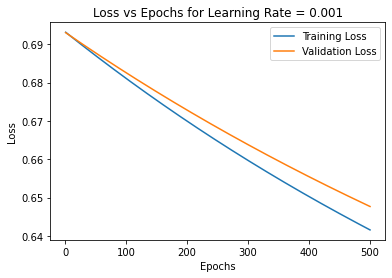

In [48]:
#learning rate = 0.001
alpha_one = 0.001

# Call the logistic regression function
weights_one, bias_one, train_loss_one, val_loss_one, train_accuracy_one, val_accuracy_one, iterations_one = logistic_regression_training(train_features, train_labels, val_features, val_labels, alpha_one, epochs)

# Plot the loss vs epochs graph
plt.plot(iterations_one, train_loss_one, label="Training Loss")
plt.plot(iterations_one, val_loss_one, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Learning Rate = 0.001")
plt.legend()
plt.show()

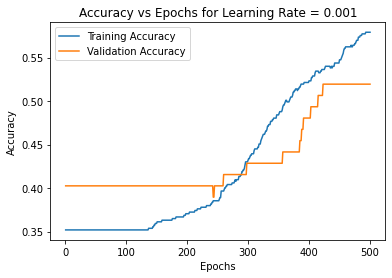

In [49]:
# Plot the accuracy vs epochs graph
plt.plot(iterations_one, train_accuracy_one, label="Training Accuracy")
plt.plot(iterations_one, val_accuracy_one, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs for Learning Rate = 0.001")
plt.legend()
plt.show()

2. $\alpha$ = 0.01

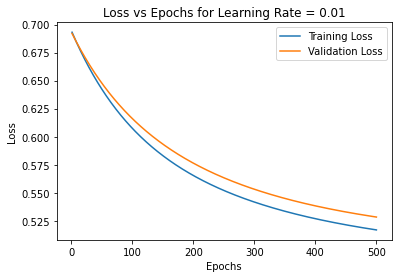

In [50]:
# learning rate = 0.01
alpha_two = 0.01

# Call the logistic regression function
weights_two, bias_two, train_loss_two, val_loss_two, train_accuracy_two, val_accuracy_two, iterations_two = logistic_regression_training(train_features, train_labels, val_features, val_labels, alpha_two, epochs)

# Plot the loss vs epochs graph
plt.plot(iterations_two, train_loss_two, label="Training Loss")
plt.plot(iterations_two, val_loss_two, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Learning Rate = 0.01")
plt.legend()
plt.show()

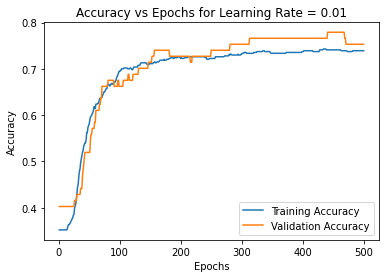

In [51]:
# Plot the accuracy vs epochs graph
plt.plot(iterations_two, train_accuracy_two, label="Training Accuracy")
plt.plot(iterations_two, val_accuracy_two, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs for Learning Rate = 0.01")
plt.legend()
plt.show()

3. $\alpha$ = 0.1

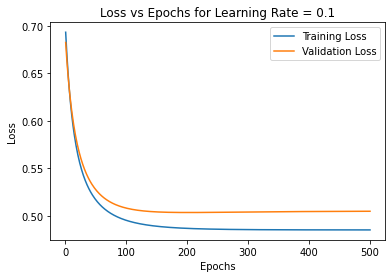

In [52]:
# learning rate = 0.1
alpha_three = 0.1

# Call the logistic regression function
weights_three, bias_three, train_loss_three, val_loss_three, train_accuracy_three, val_accuracy_three, iterations_three = logistic_regression_training(train_features, train_labels, val_features, val_labels, alpha_three, epochs)

# Plot the loss vs epochs graph
plt.plot(iterations_three, train_loss_three, label="Training Loss")
plt.plot(iterations_three, val_loss_three, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Learning Rate = 0.1")
plt.legend()
plt.show()

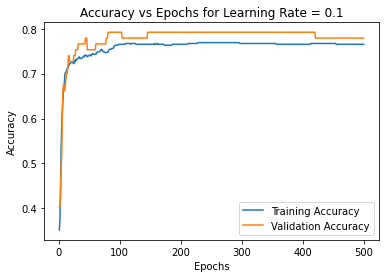

In [53]:
# Plot the accuracy vs epochs graph
plt.plot(iterations_three, train_accuracy_three, label="Training Accuracy")
plt.plot(iterations_three, val_accuracy_three, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs for Learning Rate = 0.1")
plt.legend()
plt.show()

4. $\alpha$ = 1


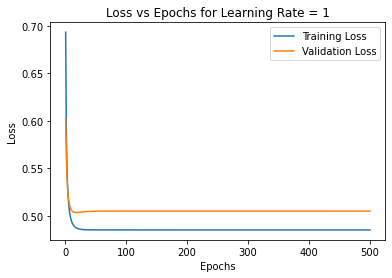

In [54]:
# learning rate = 1
alpha_four = 1

# Call the logistic regression function
weights_four, bias_four, train_loss_four, val_loss_four, train_accuracy_four, val_accuracy_four, iterations_four = logistic_regression_training(train_features, train_labels, val_features, val_labels, alpha_four, epochs)

# Plot the loss vs epochs graph
plt.plot(iterations_four, train_loss_four, label="Training Loss")
plt.plot(iterations_four, val_loss_four, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Learning Rate = 1")
plt.legend()
plt.show()

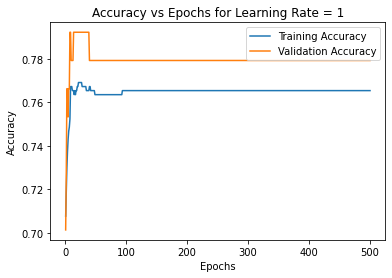

In [55]:
# Plot the accuracy vs epochs graph
plt.plot(iterations_four, train_accuracy_four, label="Training Accuracy")
plt.plot(iterations_four, val_accuracy_four, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs for Learning Rate = 1")
plt.legend()
plt.show()

### Part C - Reporting Scores
- We will make the confusion matrix and report accuracy, precision, recall and F1-scores for each learning rate

In [56]:
# Logistic Regression testing function
def logistic_regression_testing(test_features, weights, bias):
    # Calculate the predicted labels
    y_hat = sigmoid(np.dot(test_features, weights) + bias)

    # Assign appropriate labels
    y_hat = [1 if i >= 0.45 else 0 for i in y_hat]
    return y_hat

# We will report the confusion matrix, accuracy, precision, recall and F1 score for each of the learning rates

# Define the confusion matrix function
def confusion_matrix(y, y_hat):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y)):
        if(y[i] == 1 and y_hat[i] == 1):
            tp += 1
        elif(y[i] == 0 and y_hat[i] == 0):
            tn += 1
        elif(y[i] == 0 and y_hat[i] == 1):
            fp += 1
        else:
            fn += 1
    return tp, tn, fp, fn

# Define the accuracy function
def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

# Define the precision function
def precision(tp, fp):
    return tp / (tp + fp)

# Define the recall function
def recall(tp, fn):
    return tp / (tp + fn)

# Define the F1 score function
def f1_score(prec, rec):
    return 2 * prec * rec / (prec + rec)

1. Learning Rate = 0.001

In [57]:
y_hat_one = logistic_regression_testing(test_features, weights_one, bias_one)

# Calculate the confusion matrix, accuracy, precision, recall and F1 score for learning rate = 0.001
tp_one, tn_one, fp_one, fn_one = confusion_matrix(test_labels, y_hat_one)

acc_one = accuracy(tp_one, tn_one, fp_one, fn_one)
prec_one = precision(tp_one, fp_one)
rec_one = recall(tp_one, fn_one)
f1_one = f1_score(prec_one, rec_one)

# Print the confusion matrix
print("Confusion Matrix for Learning Rate = 0.001 :")
print([[tn_one, fp_one], [fn_one, tp_one]])

# Print the accuracy
print("Accuracy for Learning Rate = 0.001: ", round(acc_one, 5))

# Print the precision
print("Precision for Learning Rate = 0.001: ", round(prec_one, 5))

# Print the recall
print("Recall for Learning Rate = 0.001: ", round(rec_one, 5))

# Print the F1 score
print("F1 Score for Learning Rate = 0.001: ", round(f1_one, 5))

Confusion Matrix for Learning Rate = 0.001 :
[[39, 67], [1, 47]]
Accuracy for Learning Rate = 0.001:  0.55844
Precision for Learning Rate = 0.001:  0.41228
Recall for Learning Rate = 0.001:  0.97917
F1 Score for Learning Rate = 0.001:  0.58025


2. Learning Rate = 0.01

In [58]:
y_hat_two = logistic_regression_testing(test_features, weights_two, bias_two)

# Calculate the confusion matrix, accuracy, precision, recall and F1 score for learning rate = 0.01
tp_two, tn_two, fp_two, fn_two = confusion_matrix(test_labels, y_hat_two)

acc_two = accuracy(tp_two, tn_two, fp_two, fn_two)
prec_two = precision(tp_two, fp_two)
rec_two = recall(tp_two, fn_two)
f1_two = f1_score(prec_two, rec_two)

# Print the confusion matrix
print("Confusion Matrix for Learning Rate = 0.01 :")
print([[tn_two, fp_two], [fn_two, tp_two]])

# Print the accuracy
print("Accuracy for Learning Rate = 0.01: ", round(acc_two, 5))

# Print the precision
print("Precision for Learning Rate = 0.01: ", round(prec_two, 5))

# Print the recall
print("Recall for Learning Rate = 0.01: ", round(rec_two, 5))

# Print the F1 score
print("F1 Score for Learning Rate = 0.01: ", round(f1_two, 5))

Confusion Matrix for Learning Rate = 0.01 :
[[88, 18], [11, 37]]
Accuracy for Learning Rate = 0.01:  0.81169
Precision for Learning Rate = 0.01:  0.67273
Recall for Learning Rate = 0.01:  0.77083
F1 Score for Learning Rate = 0.01:  0.71845


3. Learning Rate = 0.1

In [59]:
# Calculate the confusion matrix, accuracy, precision, recall and F1 score for learning rate = 0.1
y_hat_three = logistic_regression_testing(test_features, weights_three, bias_three)

tp_three, tn_three, fp_three, fn_three = confusion_matrix(test_labels, y_hat_three)

acc_three = accuracy(tp_three, tn_three, fp_three, fn_three)

prec_three = precision(tp_three, fp_three)

rec_three = recall(tp_three, fn_three)

f1_three = f1_score(prec_three, rec_three)

# Print the confusion matrix
print("Confusion Matrix for Learning Rate = 0.1 :")
print([[tn_three, fp_three], [fn_three, tp_three]])

# Print the accuracy
print("Accuracy for Learning Rate = 0.1: ", round(acc_three, 5))

# Print the precision
print("Precision for Learning Rate = 0.1: ", round(prec_three, 5))

# Print the recall
print("Recall for Learning Rate = 0.1: ", round(rec_three, 5))

# Print the F1 score
print("F1 Score for Learning Rate = 0.1: ", round(f1_three, 5))

Confusion Matrix for Learning Rate = 0.1 :
[[93, 13], [16, 32]]
Accuracy for Learning Rate = 0.1:  0.81169
Precision for Learning Rate = 0.1:  0.71111
Recall for Learning Rate = 0.1:  0.66667
F1 Score for Learning Rate = 0.1:  0.68817


4. Learning Rate = 1

In [60]:
# Calculate the confusion matrix, accuracy, precision, recall and F1 score for learning rate = 1
y_hat_four = logistic_regression_testing(test_features, weights_four, bias_four)

tp_four, tn_four, fp_four, fn_four = confusion_matrix(test_labels, y_hat_four)

acc_four = accuracy(tp_four, tn_four, fp_four, fn_four)

prec_four = precision(tp_four, fp_four)

rec_four = recall(tp_four, fn_four)

f1_four = f1_score(prec_four, rec_four)

# Print the confusion matrix
print("Confusion Matrix for Learning Rate = 1 :")
print([[tn_four, fp_four], [fn_four, tp_four]])

# Print the accuracy
print("Accuracy for Learning Rate = 1: ", round(acc_four, 5))

# Print the precision
print("Precision for Learning Rate = 1: ", round(prec_four, 5))

# Print the recall
print("Recall for Learning Rate = 1: ", round(rec_four, 5))

# Print the F1 score
print("F1 Score for Learning Rate = 1: ", round(f1_four, 5))

Confusion Matrix for Learning Rate = 1 :
[[93, 13], [16, 32]]
Accuracy for Learning Rate = 1:  0.81169
Precision for Learning Rate = 1:  0.71111
Recall for Learning Rate = 1:  0.66667
F1 Score for Learning Rate = 1:  0.68817


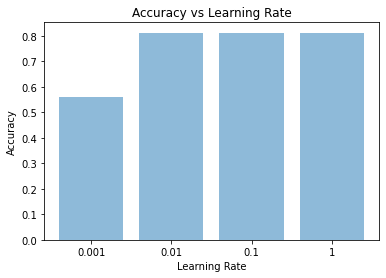

In [61]:
# Plot the accuracies for all the learning rates in a bar graph

accuracies = [acc_one, acc_two, acc_three, acc_four]
labels = ["0.001", "0.01", "0.1", "1"]
x_pos = np.arange(len(labels))
plt.bar(x_pos, accuracies, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate')
plt.show()



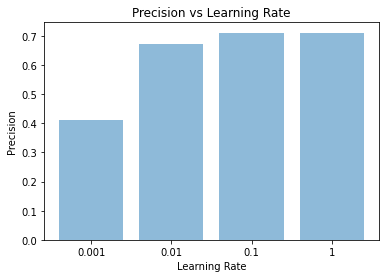

In [62]:
# Plot the precisions for all the learning rates in a bar graph

precisions = [prec_one, prec_two, prec_three, prec_four]
labels = ["0.001", "0.01", "0.1", "1"]
x_pos = np.arange(len(labels))
plt.bar(x_pos, precisions, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.xlabel('Learning Rate')
plt.ylabel('Precision')
plt.title('Precision vs Learning Rate')
plt.show()

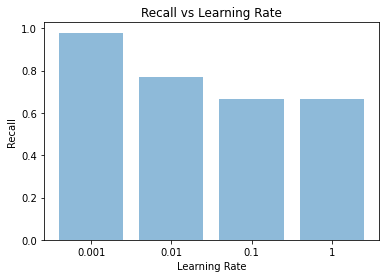

In [63]:
# Plot the recalls for all the learning rates in a bar graph
recalls = [rec_one, rec_two, rec_three, rec_four]
labels = ["0.001", "0.01", "0.1", "1"]

x_pos = np.arange(len(labels))
plt.bar(x_pos, recalls, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.xlabel('Learning Rate')
plt.ylabel('Recall')
plt.title('Recall vs Learning Rate')
plt.show()

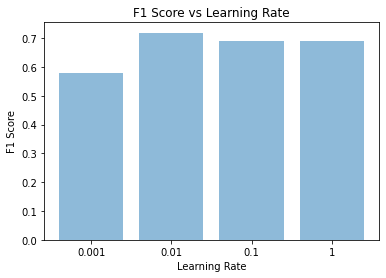

In [64]:
# Plot the F1 scores for all the learning rates in a bar graph
f1_scores = [f1_one, f1_two, f1_three, f1_four]
labels = ["0.001", "0.01", "0.1", "1"]

x_pos = np.arange(len(labels))
plt.bar(x_pos, f1_scores, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Learning Rate')
plt.show()

### Part D - Regularisation

1. L1 (Lasso) Regression: Implementing Logistic Regression with Lasso-L1 Regularisation

In [65]:
# Define the loss function with L1 regularisation
def cross_entropy_loss_l1(y, y_hat, reg_parameter, weights):
    return -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9)) + reg_parameter * np.sum(np.abs(weights))

# Define the logistic regression function with L1 regularisation
def logistic_reg_l1(train_features, train_labels, val_features, val_labels, learning_rate, epochs, lambda_l1):

    # Necessary arrays for the plots
    loss_train = []
    loss_val = []
    accuracy_train = []
    accuracy_val = []

    iterations = np.arange(1, epochs+1)

    # Initialise the weights and bias as 0
    weights = np.zeros(train_features.shape[1])
    bias = 0

    # Iterate over the number of epochs taking into account L1 regularisation
    while(epochs != 0):
        # Calculate the predicted labels
        y_hat = sigmoid(np.dot(train_features, weights) + bias)

        # Calculate the loss
        loss = cross_entropy_loss_l1(train_labels, y_hat, lambda_l1, weights)

        # Calculate the gradients
        dw = np.dot(train_features.T, (y_hat - train_labels)) / train_features.shape[0] + lambda_l1 * np.sign(weights)
        db = np.sum(y_hat - train_labels) / train_features.shape[0]

        # Update the weights and bias
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db

        # Calculate the predicted labels for the validation set
        y_hat_val = sigmoid(np.dot(val_features, weights) + bias)

        # Calculate the loss for the validation set
        val_loss = cross_entropy_loss_l1(val_labels, y_hat_val, lambda_l1, weights)

        # Append the losses to the loss arrays
        loss_train.append(loss)
        loss_val.append(val_loss)

        # Calculate the accuracy for the training set in terms of percentage
        y_hat_train = sigmoid(np.dot(train_features, weights) + bias)
        y_hat_train[y_hat_train < 0.45] = 0
        y_hat_train[y_hat_train >= 0.45] = 1
        accuracy_train.append(np.mean(y_hat_train == train_labels))

        # Calculate the accuracy for the validation set
        y_hat_val = sigmoid(np.dot(val_features, weights) + bias)
        y_hat_val[y_hat_val < 0.45] = 0
        y_hat_val[y_hat_val >= 0.45] = 1
        accuracy_val.append(np.mean(y_hat_val == val_labels))

        epochs -= 1
    loss_train = np.array(loss_train)
    loss_val = np.array(loss_val)
    accuracy_train = np.array(accuracy_train)
    accuracy_val = np.array(accuracy_val)
    return weights, bias, loss_train, loss_val, accuracy_train, accuracy_val, iterations
       

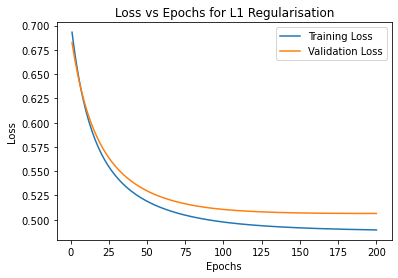

In [66]:
# Hyperparameters
epochs_l1 = 200

# learning rate = 0.1
alpha_l1 = 0.1

# lambda = 0.001
lambda_l1 = 0.001

# lambda = 0.01
#lambda_l1 = 0.01

# lambda = 0.1
#lambda_l1 = 0.1

# lambda = 1
#lambda_l1 = 1



# Call the logistic regression function with L1 regularisation
weights_l1, bias_l1, train_loss_l1, val_loss_l1, train_accuracy_l1, val_accuracy_l1, iterations_l1 = logistic_reg_l1(train_features, train_labels, val_features, val_labels, alpha_l1, epochs_l1, lambda_l1)

# Plot the loss vs epochs graph
plt.plot(iterations_l1, train_loss_l1, label="Training Loss")
plt.plot(iterations_l1, val_loss_l1, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for L1 Regularisation")
plt.legend()
plt.show()

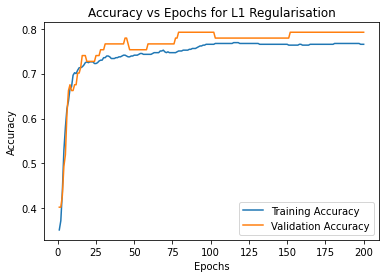

In [67]:
# Plot the accuracy vs epochs graph
plt.plot(iterations_l1, train_accuracy_l1, label="Training Accuracy")
plt.plot(iterations_l1, val_accuracy_l1, label="Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs for L1 Regularisation")
plt.legend()
plt.show()

2. L2 (Ridge Regression) : Implementing Logistic Regression with L2-Regression

In [68]:
# Define the loss function with L2 regularisation
def cross_entropy_loss_l2(y, y_hat, reg_parameter, weights):
    return -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9)) + reg_parameter * np.sum(np.square(weights))

# Define the logistic regression function with L2 regularisation
def logistic_reg_l2(train_features, train_labels, val_features, val_labels, learning_rate, epochs, lambda_l2):

    # Necessary arrays for the plots
    loss_train = []
    loss_val = []
    accuracy_train = []
    accuracy_val = []

    iterations = np.arange(1, epochs+1)

    # Initialise the weights and bias as 0
    weights = np.zeros(train_features.shape[1])
    bias = 0

    # Iterate over the number of epochs taking into account L2 regularisation
    while(epochs != 0):
        # Calculate the predicted labels
        y_hat = sigmoid(np.dot(train_features, weights) + bias)

        # Calculate the loss
        loss = cross_entropy_loss_l2(train_labels, y_hat, lambda_l2, weights)

        # Calculate the gradients
        dw = np.dot(train_features.T, (y_hat - train_labels)) / train_features.shape[0] + 2 * lambda_l2 * weights
        db = np.sum(y_hat - train_labels) / train_features.shape[0]

        # Update the weights and bias
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db

        # Calculate the predicted labels for the validation set
        y_hat_val = sigmoid(np.dot(val_features, weights) + bias)

        # Calculate the loss for the validation set
        val_loss = cross_entropy_loss_l2(val_labels, y_hat_val, lambda_l2, weights)

        # Append the losses to the loss arrays
        loss_train.append(loss)
        loss_val.append(val_loss)

        # Calculate the accuracy for the training set in terms of percentage
        y_hat_train = sigmoid(np.dot(train_features, weights) + bias)
        y_hat_train[y_hat_train < 0.45] = 0
        y_hat_train[y_hat_train >= 0.45] = 1
        accuracy_train.append(np.mean(y_hat_train == train_labels))

        # Calculate the accuracy for the validation set
        y_hat_val = sigmoid(np.dot(val_features, weights) + bias)
        y_hat_val[y_hat_val < 0.45] = 0
        y_hat_val[y_hat_val >= 0.45] = 1
        accuracy_val.append(np.mean(y_hat_val == val_labels))

        epochs -= 1
    loss_train = np.array(loss_train)
    loss_val = np.array(loss_val)
    accuracy_train = np.array(accuracy_train)
    accuracy_val = np.array(accuracy_val)
    return weights, bias, loss_train, loss_val, accuracy_train, accuracy_val, iterations
       

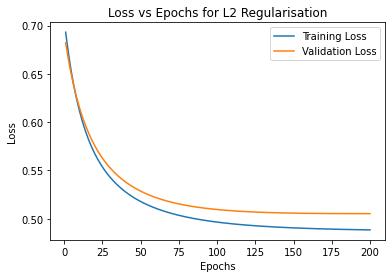

In [69]:
# Hyperparameters
epochs_l2 = 200

# learning rate = 0.1
alpha_l2 = 0.1

# lambda = 0.001
lambda_l2 = 0.001

# lambda = 0.01
#lambda_l2 = 0.01

# lambda = 0.1
#lambda_l2 = 0.1

# lambda = 1
#lambda_l2 = 1

# Call the logistic regression function with L2 regularisation
weights_l2, bias_l2, train_loss_l2, val_loss_l2, train_accuracy_l2, val_accuracy_l2, iterations_l2 = logistic_reg_l2(train_features, train_labels, val_features, val_labels, alpha_l2, epochs_l2, lambda_l2)

# Plot the loss vs epochs graph
plt.plot(iterations_l2, train_loss_l2, label="Training Loss")
plt.plot(iterations_l2, val_loss_l2, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for L2 Regularisation")
plt.legend()
plt.show()

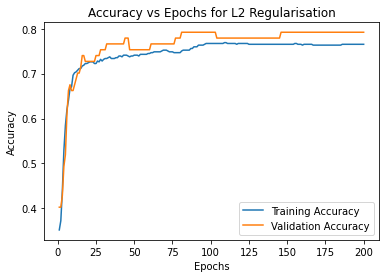

In [70]:
# Plot the accuracy vs epochs graph
plt.plot(iterations_l2, train_accuracy_l2, label="Training Accuracy")
plt.plot(iterations_l2, val_accuracy_l2, label="Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs for L2 Regularisation")
plt.legend()
plt.show()

### Part E - Using tanh as Activation

- We use the `tanh()` function instead of `sigmoid`.
- The loss function we use for this is still the cross entropy loss as $-\log(f(x))$ is always a convex function and thus continuing with cross entropy will still give us a convex loss function.
- However, since $\tanh(x)$ maps from $(-∞, ∞) \rightarrow [-1, 1]$, the original cross-entropy function needs to be tweaked a little.
- To map $\tanh(x)$ to a range between 0 and 1 we apply the following linear transformation:
$$
\tanh(x) \rightarrow \frac{1 + \tanh(x)}{2}
$$
- Therefore, the modified binary cross-entropy loss function becomes:
$$
L = -\frac{1}{m} \sum_{i=1}^{m} (y^{(i)}(\ln(\frac{1 + \tanh(x^{(i)})}{2})) - (1-y^{(i)})(\ln(\frac{1 - \tanh(x^{(i)})}{2})))
$$

- As our loss function changes, so does our derivate changing our gradient descent formulation (upon simplification of the derivative):
$$
\frac{\mathrm{d}L}{\mathrm{d}w_{j}} = -\frac{1}{m} \sum_{i=1}^{m} (2y^{(i)} - \tanh(x^{(i)})-1)({x^{(i)}_{j}})
$$

$$
\frac{\mathrm{d}L}{\mathrm{d}b} = -\frac{1}{m} \sum_{i=1}^{m} (2y^{(i)} - \tanh(x^{(i)})-1)
$$

In [71]:
# Define the loss function
def cross_entropy_loss_tanh(y, y_hat):

    # Apply the transformation to the predicted labels (add 1 and divide by 2)
    y_hat = (y_hat + 1) / 2
    return -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))

# Define the logistic regression function with tanh activation
def logistic_regression_training(train_features, train_labels, val_features, val_labels, learning_rate, epochs):
    
    # Necessary arrays for the plots
    loss_train = []
    loss_val = []
    accuracy_train = []
    accuracy_val = []
    iterations = np.arange(1, epochs+1)
    
    # Initialise the weights and bias as 0
    weights = np.zeros(train_features.shape[1])
    bias = 0

    # Iterate over the number of epochs
    while(epochs != 0):
        # Calculate the predicted labels
        z = np.dot(train_features, weights) + bias
        y_hat = np.tanh(z)

        # Calculate the loss
        loss = cross_entropy_loss_tanh(train_labels, y_hat)

        # Calculate the gradients using new loss function in terms of tanh
        dw = (-1 / train_features.shape[0]) * np.dot(train_features.T, (2*train_labels - y_hat-1))
        db = (-1 / train_features.shape[0]) * np.sum((2*train_labels - y_hat-1))
        
        # Update the weights and bias
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db

        # Calculate the predicted labels for the validation set
        y_hat_val = np.tanh(np.dot(val_features, weights) + bias)

        # Calculate the loss for the validation set
        val_loss = cross_entropy_loss_tanh(val_labels, y_hat_val)

        # Append the losses to the loss arrays
        loss_train.append(loss)
        loss_val.append(val_loss)

        # Calculate the accuracy for the training set in terms of percentage
        y_hat_train = np.tanh(np.dot(train_features, weights) + bias)
        y_hat_train[y_hat_train < 0.2] = 0
        y_hat_train[y_hat_train >= 0.2] = 1
        accuracy_train.append(np.mean(y_hat_train == train_labels))

        # Calculate the accuracy for the validation set
        y_hat_val = np.tanh(np.dot(val_features, weights) + bias)
        y_hat_val[y_hat_val < 0.2] = 0
        y_hat_val[y_hat_val >= 0.2] = 1
        accuracy_val.append(np.mean(y_hat_val == val_labels))

        epochs -= 1

    return weights, bias, loss_train, loss_val, accuracy_train, accuracy_val, iterations

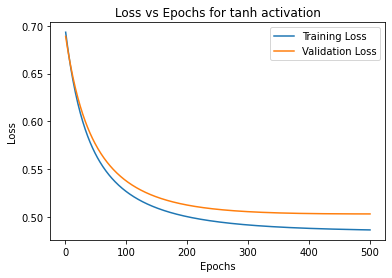

In [72]:
# Hyperparameters 
epochs_tanh = 500

# Call the logistic regression function
weights_tanh, bias_tanh, train_loss_tanh, val_loss_tanh, train_accuracy_tanh, val_accuracy_tanh, iterations_tanh = logistic_regression_training(train_features, train_labels, val_features, val_labels, 0.01, epochs_tanh)

# Plot the loss vs epochs graph
plt.plot(iterations_tanh, train_loss_tanh, label="Training Loss")
plt.plot(iterations_tanh, val_loss_tanh, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for tanh activation")

plt.legend()
plt.show()

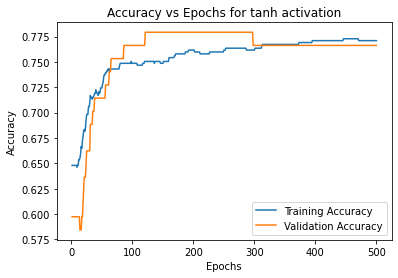

In [73]:
# Plot the accuracy vs epochs graph
plt.plot(iterations_tanh, train_accuracy_tanh, label="Training Accuracy")
plt.plot(iterations_tanh, val_accuracy_tanh, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs for tanh activation")

plt.legend()
plt.show()

In [74]:
# Define the logistic regression testing function with tanh activation
def logistic_regression_testing_tanh(test_features, weights, bias):
    # Calculate the predicted labels
    y_hat = np.tanh(np.dot(test_features, weights) + bias)

    # Assign appropriate labels
    y_hat = [1 if i >= 0.2 else 0 for i in y_hat]
    return y_hat

y_hat_tanh = logistic_regression_testing_tanh(test_features, weights_tanh, bias_tanh)

# Calculate the confusion matrix, accuracy, precision, recall and F1 score for logistic regression with tanh activation
tp_tanh, tn_tanh, fp_tanh, fn_tanh = confusion_matrix(test_labels, y_hat_tanh)

acc_tanh = accuracy(tp_tanh, tn_tanh, fp_tanh, fn_tanh)
prec_tanh = precision(tp_tanh, fp_tanh)
rec_tanh = recall(tp_tanh, fn_tanh)
f1_tanh = f1_score(prec_tanh, rec_tanh)

# Print the confusion matrix
print("Confusion Matrix for Logistic Regression with tanh activation:")
print([[tn_tanh, fp_tanh], [fn_tanh, tp_tanh]])

# Print the accuracy
print("Accuracy for Logistic Regression with tanh activation: ", round(acc_tanh, 5))

# Print the precision
print("Precision for Logistic Regression with tanh activation: ", round(prec_tanh, 5))

# Print the recall
print("Recall for Logistic Regression with tanh activation: ", round(rec_tanh, 5))

# Print the F1 score
print("F1 Score for Logistic Regression with tanh activation: ", round(f1_tanh, 5))

Confusion Matrix for Logistic Regression with tanh activation:
[[99, 7], [26, 22]]
Accuracy for Logistic Regression with tanh activation:  0.78571
Precision for Logistic Regression with tanh activation:  0.75862
Recall for Logistic Regression with tanh activation:  0.45833
F1 Score for Logistic Regression with tanh activation:  0.57143


- As clearly seen for the same learning rates, using Tanh-activation instead of sigmoid makes our model converge faster (i.e. in lesser epochs) at almost similiar or higher accuracies

### Part F - Mini-Batch Gradient Descent

In [75]:
# convert implementation of logistic regression in part 1 to mini-batch gradient descent

def logistic_reg_mini_batch(train_features, train_labels, val_features, val_labels, learning_rate, epochs, batch_size):
    m = train_features.shape[0]
    
    # Necessary arrays for the plots
    loss_train = []
    loss_val = []
    accuracy_train = []
    accuracy_val = []
    iterations = np.arange(1, epochs+1)
    
    # Initialise the weights and bias as 0
    weights = np.zeros(train_features.shape[1])
    bias = 0

    # Iterate over the number of epochs
    while(epochs != 0):
        # Shuffle the training data to create random mini-batches
        indices = np.random.permutation(m)
        train_features = train_features[indices]
        train_labels = train_labels[indices]

        # Mini-batch gradient descent
        for i in range(0, m, batch_size):
            end_idx = min(i + batch_size, m)
            batch_x = train_features[i:end_idx]
            batch_y = train_labels[i:end_idx]

            # Calculate the predicted labels for the mini-batch
            y_hat = sigmoid(np.dot(batch_x, weights) + bias)

            # Calculate the gradients for the mini-batch
            dw = np.dot(batch_x.T, (y_hat - batch_y)) / batch_size
            db = np.sum(y_hat - batch_y) / batch_size

            # Update the weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Calculate the loss for the training set
        y_hat_train = sigmoid(np.dot(train_features, weights) + bias)
        loss_train.append(cross_entropy_loss(train_labels, y_hat_train))

        # Calculate the loss for the validation set
        y_hat_val = sigmoid(np.dot(val_features, weights) + bias)
        loss_val.append(cross_entropy_loss(val_labels, y_hat_val))

        # Calculate the accuracy for the training set
        y_hat_train[y_hat_train < 0.5] = 0
        y_hat_train[y_hat_train >= 0.5] = 1
        accuracy_train.append(np.mean(y_hat_train == train_labels))

        # Calculate the accuracy for the validation set
        y_hat_val[y_hat_val < 0.5] = 0
        y_hat_val[y_hat_val >= 0.5] = 1
        accuracy_val.append(np.mean(y_hat_val == val_labels))

        epochs -= 1

    return weights, bias, loss_train, loss_val, accuracy_train, accuracy_val, iterations

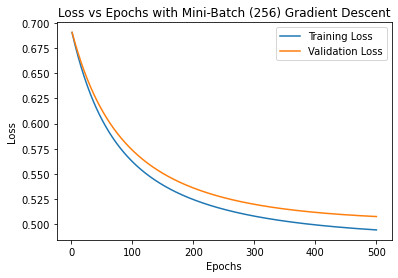

In [76]:
# Hyperparameters
epochs_mini_batch = 500

# learning rate = 0.01
alpha_mini_batch = 0.01

# batch size = 16
#batch_size = 16

# batch size = 32
#batch_size = 32

# batch size = 64
#batch_size = 64

# batch size = 256
batch_size = 256


# Call the logistic regression function
weights_mini_batch, bias_mini_batch, train_loss_mini_batch, val_loss_mini_batch, train_accuracy_mini_batch, val_accuracy_mini_batch, iterations_mini_batch = logistic_reg_mini_batch(train_features, train_labels, val_features, val_labels, alpha_mini_batch, epochs_mini_batch, batch_size)

# Plot the loss vs epochs graph
plt.plot(iterations_mini_batch, train_loss_mini_batch, label="Training Loss")
plt.plot(iterations_mini_batch, val_loss_mini_batch, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs with Mini-Batch (256) Gradient Descent")
plt.legend()
plt.show()

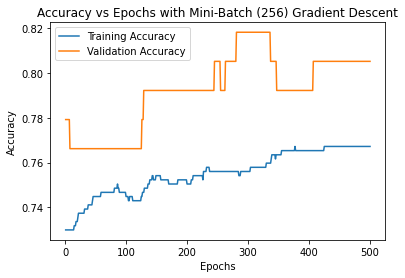

In [77]:
# Plot the accuracy vs epochs graph
plt.plot(iterations_mini_batch, train_accuracy_mini_batch, label="Training Accuracy")
plt.plot(iterations_mini_batch, val_accuracy_mini_batch, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs with Mini-Batch (256) Gradient Descent")
plt.legend()
plt.show()

In [78]:
y_hat_mini_batch = logistic_regression_testing(test_features, weights_mini_batch, bias_mini_batch)

# Calculate the confusion matrix, accuracy, precision, recall and F1 score for logistic regression with mini-batch gradient descent
tp_mini_batch, tn_mini_batch, fp_mini_batch, fn_mini_batch = confusion_matrix(test_labels, y_hat_mini_batch)

acc_mini_batch = accuracy(tp_mini_batch, tn_mini_batch, fp_mini_batch, fn_mini_batch)
prec_mini_batch = precision(tp_mini_batch, fp_mini_batch)
rec_mini_batch = recall(tp_mini_batch, fn_mini_batch)
f1_mini_batch = f1_score(prec_mini_batch, rec_mini_batch)

# Print the confusion matrix
print("Confusion Matrix for Logistic Regression with Mini-Batch Gradient Descent:")
print([[tn_mini_batch, fp_mini_batch], [fn_mini_batch, tp_mini_batch]])

# Print the accuracy
print("Accuracy for Logistic Regression with Mini-Batch Gradient Descent: ", round(acc_mini_batch, 5))

# Print the precision
print("Precision for Logistic Regression with Mini-Batch Gradient Descent: ", round(prec_mini_batch, 5))

# Print the recall
print("Recall for Logistic Regression with Mini-Batch Gradient Descent: ", round(rec_mini_batch, 5))

# Print the F1 score
print("F1 Score for Logistic Regression with Mini-Batch Gradient Descent: ", round(f1_mini_batch, 5))

Confusion Matrix for Logistic Regression with Mini-Batch Gradient Descent:
[[91, 15], [12, 36]]
Accuracy for Logistic Regression with Mini-Batch Gradient Descent:  0.82468
Precision for Logistic Regression with Mini-Batch Gradient Descent:  0.70588
Recall for Logistic Regression with Mini-Batch Gradient Descent:  0.75
F1 Score for Logistic Regression with Mini-Batch Gradient Descent:  0.72727
